# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
%matplotlib inline

/Users/bjr-fov/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [15]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: There are 400 observations, but it looks like there are 2 null or missing points in the GRE and GPA columns (unclear if they are the same instance), and 1 null or missing point in the prestige column.

#### Question 2. Create a summary table

In [ ]:
#function

In [16]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because there is a higher variance in GRE scores than GPAs. The range of a GPA is only 0-4 whereas GRE is up to 800, and because there is substantial variance in both, and the GRE scores will vary from each other greatly and each score itself is a difference of 10, the difference between possible scores is much larger than the whole range of GPAs.

#### Question 4. Drop data points with missing data


In [22]:
df_raw = df_raw.dropna()

print df_raw['gre'].isnull().sum()
print df_raw['gpa'].isnull().sum()
print df_raw['prestige'].isnull().sum()

0
0
0


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: I've counted the number of nulls in all columns to confirm (see above)

#### Question 6. Create box plots for GRE and GPA

{'boxes': [<matplotlib.lines.Line2D at 0x1176b1650>],
 'caps': [<matplotlib.lines.Line2D at 0x117404890>,
 'fliers': [<matplotlib.lines.Line2D at 0x1173e3310>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1173e3890>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10ab972d0>,
  <matplotlib.lines.Line2D at 0x1176b1ed0>]}

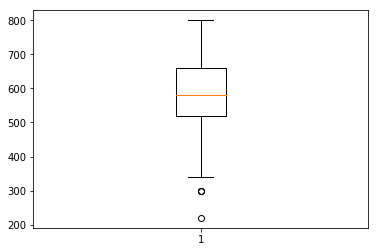

In [23]:
#boxplot 1

plt.boxplot(df_raw['gre'])

{'boxes': [<matplotlib.lines.Line2D at 0x1176f4e10>],
 'caps': [<matplotlib.lines.Line2D at 0x117703d10>,
 'fliers': [<matplotlib.lines.Line2D at 0x11771a050>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11770e9d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1176f4f90>,
  <matplotlib.lines.Line2D at 0x1177036d0>]}

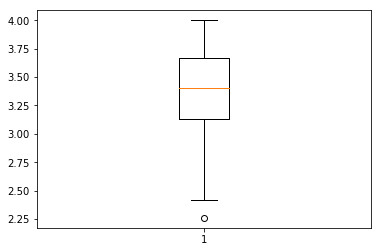

In [24]:
#boxplot 2 

plt.boxplot(df_raw['gpa'])

#### Question 7. What do this plots show?

Answer: We can see the placement of the quartiles in the .describe() function above, but plotting these graphs shows us more. For one, it shows that both graphs have outliers on the lower end (data points that fall outside of the range of 1.5x the size of the interquartile range below Q1. There is a long whisker at the bottom of the both graphs (bigger on GPA). The higher ranges is slightly more dense in both plots. GPA has similar 2nd and 3rd quartile sizes and GRE has a larger 3rd quartile than 2nd. Both graphs lean towards the top of the range.

#### Question 8. Describe each distribution 

(array([  1.,   3.,  16.,  28.,  50.,  75.,  81.,  64.,  44.,  35.]),
 array([ 220.,  278.,  336.,  394.,  452.,  510.,  568.,  626.,  684.,
         742.,  800.]),
 <a list of 10 Patch objects>)

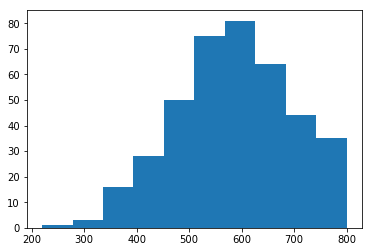

In [31]:
# plot the distribution of each variable 

plt.hist(df_raw['gre'])

(array([  3.,   4.,  16.,  32.,  42.,  57.,  76.,  65.,  39.,  63.]),
 array([ 2.26 ,  2.434,  2.608,  2.782,  2.956,  3.13 ,  3.304,  3.478,
         3.652,  3.826,  4.   ]),
 <a list of 10 Patch objects>)

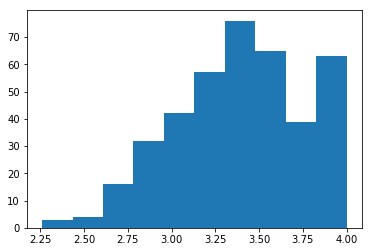

In [32]:
plt.hist(df_raw['gpa'])



(array([  61.,  148.,  121.,   67.]),
 array([1, 2, 3, 4, 5]),
 <a list of 4 Patch objects>)

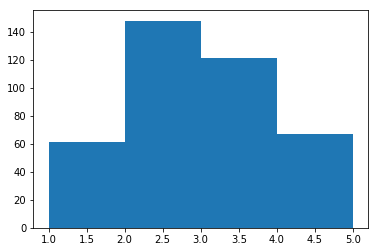

In [37]:
plt.hist(df_raw['prestige'], bins=[1, 2, 3, 4, 5])

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No. GRE and GPA are too positively skewed, and prestige is too negatively skewed. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: It depends on what we're trying to do with the data. If we needed to, we can get rid of the outliers in the GPA and GRE data sets.

#### Question 11. Which of our variables are potentially colinear? 

In [46]:
# create a correlation matrix for the data

df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: The strongest correlation seems to be between GRE and GPA, but none of the correlations between variables is especially strong. Prestige is negatively associated with admission, which is potentially interesting. GRE and GPA have only slight positive association with admission. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: We will look to see if the prestige of an applicant's undergraduate school is associated with whether the applicant was accepted. This analysis will take place for the range of applicants that have been included in the UCLA data, which does not have clear parameters from what is published. 

#### Question 14. What is your hypothesis? 

Answer: If I didn't see the above, my hypothesis would be that the more prestigious an applicant's undergraduate institution is, the more likely they would be accepted. 

If I were designing a test based on confidence, I would set the null hypothesis to "There is a correlation between the prestigiousness of an applic

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data